In [1]:
#Data Source: PDFs parsed from https://coststudies.ucdavis.edu/current/commodities

In [2]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('UCD-data2.csv')
df['true?'] = ((df['Labor Cost'] + df['Fuel'] + df['Lube & Repairs'] + df['Material Cost'] + df['Custom/Rent']) - df['Total Cost'])<2
filtered_df = df[df['true?'] == True]
times_df = filtered_df.groupby("Product", as_index=False)["Time (Hrs./Ac)"].mean()

/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_83797/2051888399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")


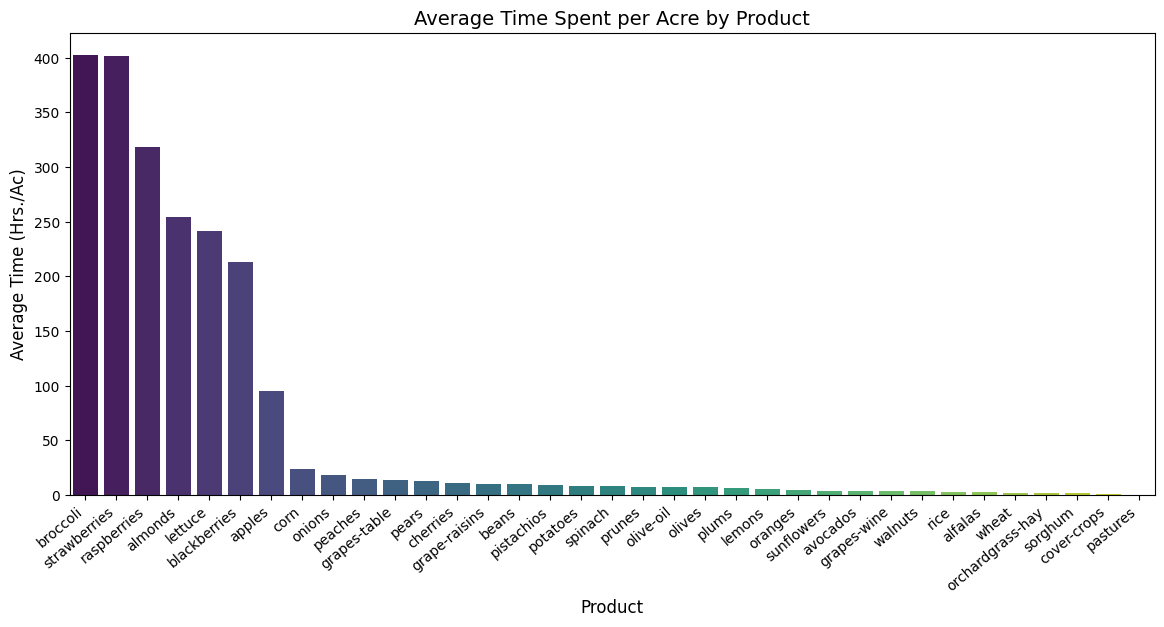

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

times_df = times_df.sort_values(by="Time (Hrs./Ac)", ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")

plt.xlabel("Product", fontsize=12)
plt.ylabel("Average Time (Hrs./Ac)", fontsize=12)
plt.title("Average Time Spent per Acre by Product", fontsize=14)
plt.xticks(rotation=40, ha="right")  

plt.show()

In [4]:
cost_df = filtered_df.groupby("Product", as_index=False)[["Labor Cost", "Total Cost"]].sum()


/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_83797/2036847763.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_83797/2036847763.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


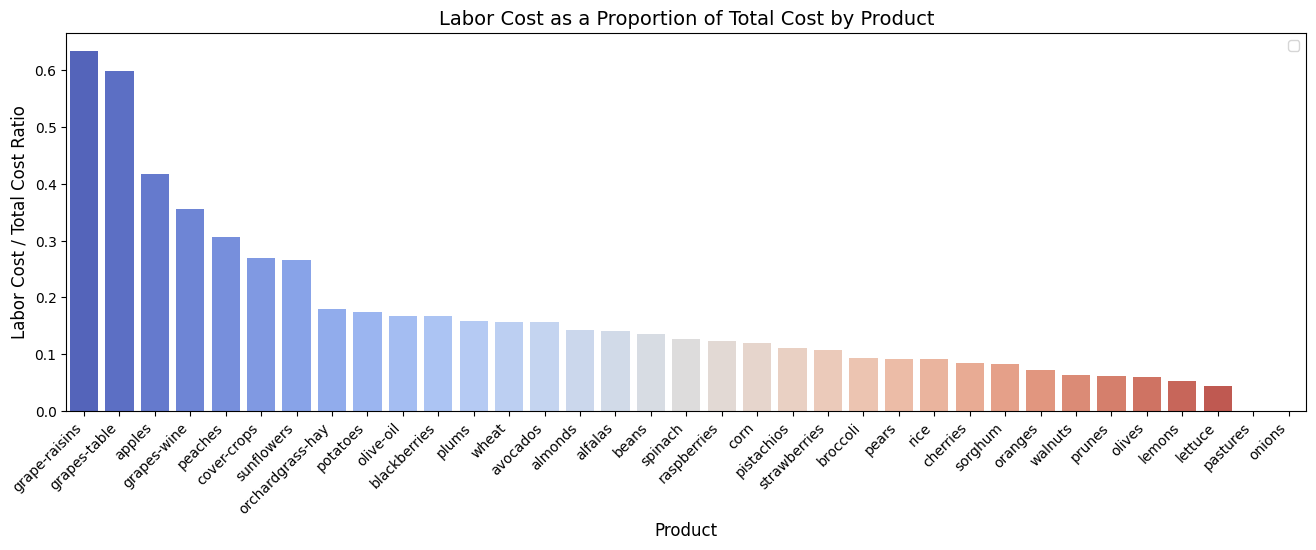

In [5]:
# new
import matplotlib.pyplot as plt
import seaborn as sns

cost_df["Ratio"] = cost_df["Labor Cost"] / cost_df["Total Cost"]
cost_df = cost_df.sort_values(by="Ratio", ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
# plt.axhline(y=0.3, color='black', linestyle='dashed', linewidth=1.5, label="Threshold (0.3)")
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.subplots_adjust(bottom=0.25)  

plt.xlabel("Product", fontsize=12)
plt.ylabel("Labor Cost / Total Cost Ratio", fontsize=12)
plt.title("Labor Cost as a Proportion of Total Cost by Product", fontsize=14)
plt.legend()

plt.show()

/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_83797/3088993235.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_83797/3088993235.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


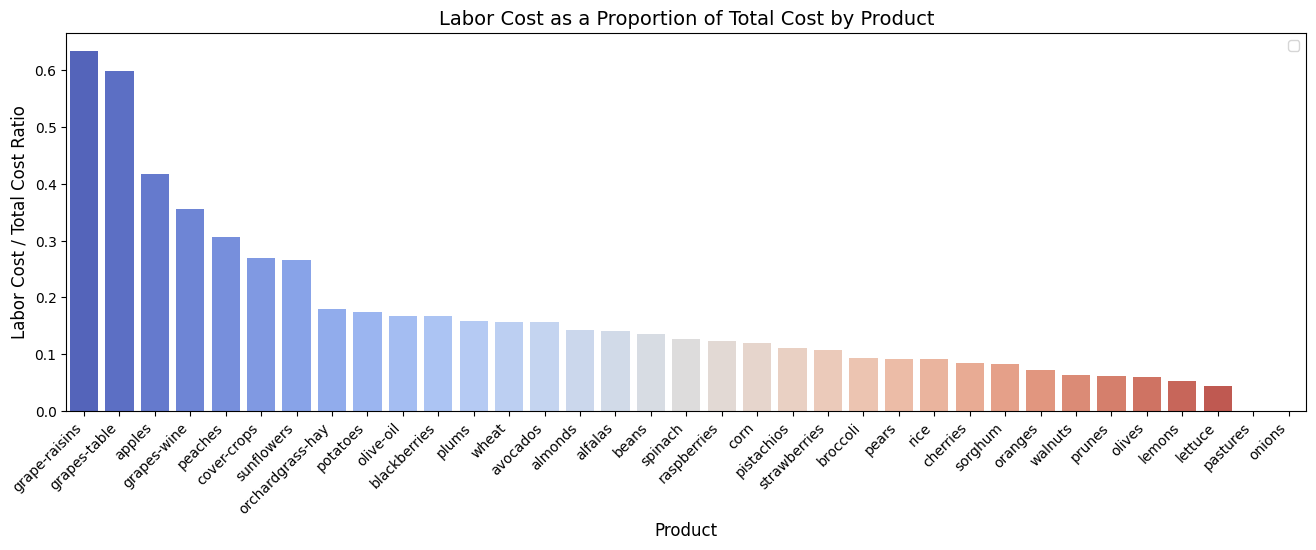

In [6]:
#no field crops. bean, alfalas, etc

# old
import matplotlib.pyplot as plt
import seaborn as sns

cost_df["Ratio"] = cost_df["Labor Cost"] / cost_df["Total Cost"]
cost_df = cost_df.sort_values(by="Ratio", ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
# plt.axhline(y=0.3, color='black', linestyle='dashed', linewidth=1.5, label="Threshold (0.3)")
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.subplots_adjust(bottom=0.25)  

plt.xlabel("Product", fontsize=12)
plt.ylabel("Labor Cost / Total Cost Ratio", fontsize=12)
plt.title("Labor Cost as a Proportion of Total Cost by Product", fontsize=14)
plt.legend()

plt.show()

In [7]:
cost_df

,Product,Labor Cost,Total Cost,Ratio
10,grape-raisins,3108.00,4900.00,0.634286
11,grapes-table,49399.00,82469.00,0.599001
2,apples,4725.00,11293.00,0.418401
12,grapes-wine,9009.00,25267.00,0.356552
21,peaches,3423.00,11153.00,0.306913
9,cover-crops,42.00,156.00,0.269231
32,sunflowers,268.00,1005.00,0.266667
19,orchardgrass-hay,159.00,882.00,0.180272
25,potatoes,1052.58,6033.66,0.174451
15,olive-oil,186.00,1115.00,0.166816


In [8]:
cost_df
#come up with weighted score, including acrage per crop and stuff. production per state? indicators for labor intensiveness

#look into social deprivation index

#https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
"""
https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it
    Apply factor analysis (dimension reducing technique, look for latent variance between variables)
    factor analysis basically report a weight of importance, which we multiply with z score to find fianl
    


The idea is that
social deprivation -> undereducation, bad housing, enemployment, etc
    
However, social deprivation is more abstraction of an index, cannot be measured

So we look at quantifiable values we believe is associated with it

? -> undereducation, bad housing, enemployment, etc
Then we work backwards to find social deprivation


So something similar with this?

labor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre



then we work backwards

How could we apply this to farm labor?
    1. find variables associated with manual labor (assuming the latent)
    
#how labor intensive a states labor intensivity is?

ratio of cost: calculate with acrage of various crops per state
    
    
    
"""

'\nhttps://www.graham-center.org/maps-data-tools/social-deprivation-index.html\n    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it\n    Apply factor analysis (dimension reducing technique, look for latent variance between variables)\n    factor analysis basically report a weight of importance, which we multiply with z score to find fianl\n    \n\n\nThe idea is that\nsocial deprivation -> undereducation, bad housing, enemployment, etc\n    \nHowever, social deprivation is more abstraction of an index, cannot be measured\n\nSo we look at quantifiable values we believe is associated with it\n\n? -> undereducation, bad housing, enemployment, etc\nThen we work backwards to find social deprivation\n\n\nSo something similar with this?\n\nlabor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre\n\n\n\nthen we work backwards\n\nHow could we apply this to farm labor?\n    1. find var

In [9]:
data = {}
years = [2012, 2013, 2014, 2015, 2016 ,2017, 2018, 2019, 2020, 2021, 2022, 2023]
crop_to_products = {
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'APPLES': ['apples'],
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'RASPBERRIES': ['raspberries'],
    'PLUMS': ['plums'],
    'BLACKBERRIES': ['blackberries'],
    'PEACHES': ['peaches'],
    'CHERRIES': ['cherries'],
    'WHEAT': ['wheat'],
    'OLIVES': ['olives', 'olive-oil'],
    'BROCCOLI': ['broccoli'],
    'SUNFLOWER': ['sunflowers'],
    'LEMONS': ['lemons'],
    'BEANS': ['beans'],
    'AVOCADOS': ['avocados'],
    'POTATOES': ['potatoes'],
    'CORN': ['corn'],
    'ORANGES': ['oranges'],
    'ALMONDS': ['almonds'],
    'SPINACH': ['spinach'],
    'LETTUCE': ['lettuce'],
    'PISTACHIOS': ['pistachios'],
    'PRUNES': ['prunes'],
    'TOMATOES': ['tomatoes'],
    'PEARS': ['pears'],
    'SORGHUM': ['sorghum'],
    'WALNUTS': ['walnuts'],
    'RICE': ['rice']
}
"""perennial crops: live and produce for multiple years
annual crops: replanted every year

we should use area bearing for perennial crops,
and area harvested for annual crops
"""



crop_lifecycle = {
    'GRAPES': 'perennial',
    'APPLES': 'perennial',
    'RASPBERRIES': 'perennial',
    'PLUMS': 'perennial',
    'BLACKBERRIES': 'perennial',
    'PEACHES': 'perennial',
    'CHERRIES': 'perennial',
    'WHEAT': 'annual',
    'OLIVES': 'perennial',
    'BROCCOLI': 'annual',
    'SUNFLOWER': 'annual',
    'LEMONS': 'perennial',
    'BEANS': 'annual',
    'AVOCADOS': 'perennial',
    'POTATOES': 'annual',
    'CORN': 'annual',
    'ORANGES': 'perennial',
    'ALMONDS': 'perennial',
    'SPINACH': 'annual',
    'LETTUCE': 'annual',
    'PISTACHIOS': 'perennial',
    'PRUNES': 'perennial',
    'TOMATOES': 'annual',
    'PEARS': 'perennial',
    'SORGHUM': 'annual',
    'WALNUTS': 'perennial',
    'RICE': 'annual'
}


columns_to_keep = ['state_name'] + list(crop_to_products.keys())


for year in years:
    df = pd.read_csv(f"../USDAstats/norm-data/{year}_summed.csv")
    filtered_columns = [col for col in columns_to_keep if col in df.columns]
    data[year] = df[filtered_columns]

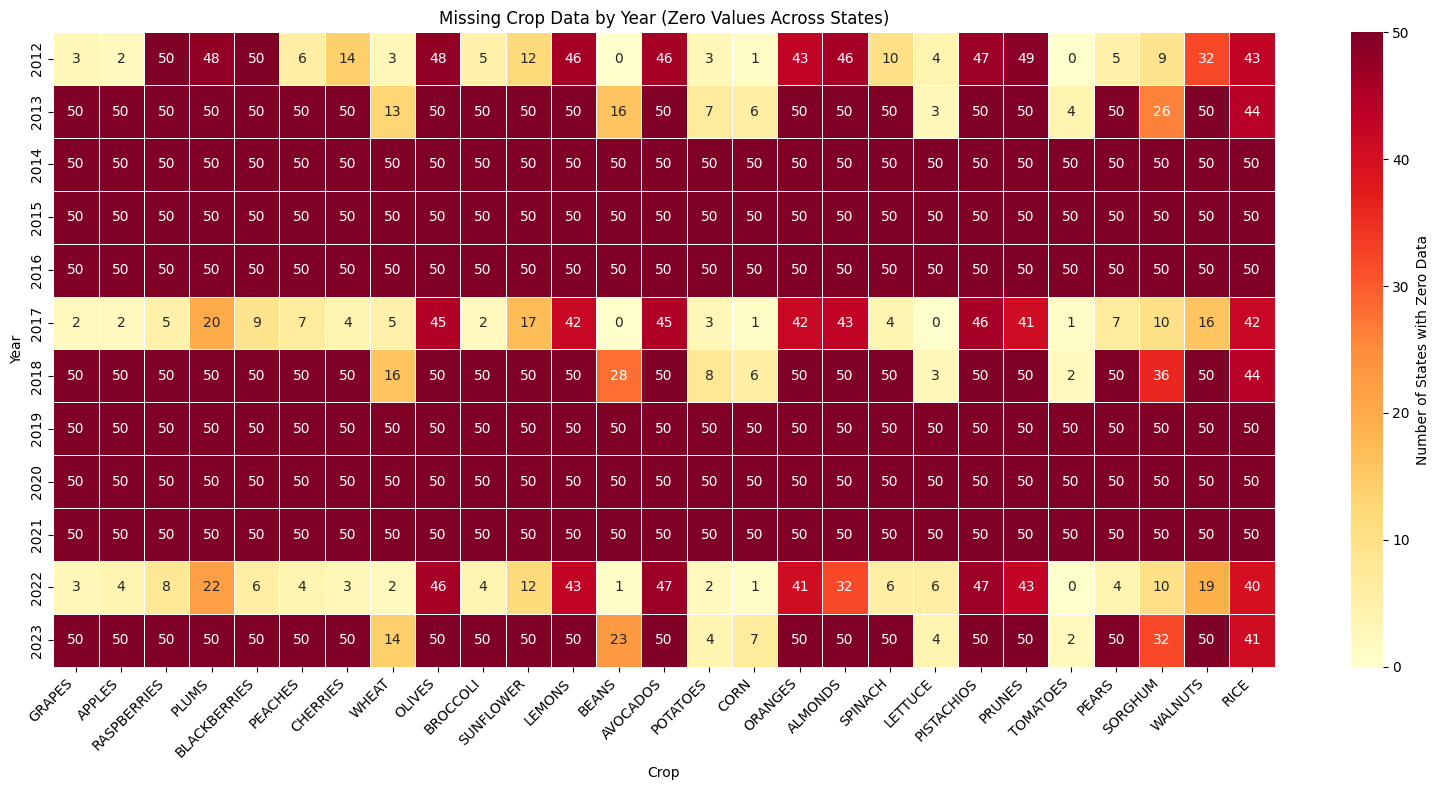

In [10]:
missing_counts = {}

for year, df in data.items():
    df = df.copy()

    # If df is empty, simulate 50 rows (1 per state) with zeros
    if df.empty:
        df = pd.DataFrame(columns=columns_to_keep)
        df['state_name'] = [f'State {i+1}' for i in range(50)]  # Placeholder state names
        for col in columns_to_keep:
            if col != 'state_name':
                df[col] = 0
    else:
        # Ensure all expected columns are present
        for col in columns_to_keep:
            if col not in df.columns:
                df[col] = 0

    # Keep only the relevant columns
    df = df[columns_to_keep]

    # Count zero values per crop (excluding 'state_name')
    zero_counts = (df.drop(columns='state_name') == 0).sum()
    missing_counts[year] = zero_counts

# Continue as before...
missing_df = pd.DataFrame(missing_counts).T
missing_df = missing_df.loc[:, missing_df.sum().sort_values(ascending=False).index]
missing_df = missing_df.fillna(0).astype(int)

# Reorder and plot
ordered_crops = list(crop_to_products.keys())
missing_df = missing_df[ordered_crops]

plt.figure(figsize=(16, 8))
sns.heatmap(
    missing_df,
    cmap='YlOrRd',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Number of States with Zero Data'}
)
plt.title("Missing Crop Data by Year (Zero Values Across States)")
plt.xlabel("Crop")
plt.ylabel("Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
state_abbrev = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR',
    'CALIFORNIA': 'CA', 'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE',
    'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL',
    'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA',
    'MAINE': 'ME', 'MARYLAND': 'MD', 'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI',
    'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS', 'MISSOURI': 'MO', 'MONTANA': 'MT',
    'NEBRASKA': 'NE', 'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ',
    'NEW MEXICO': 'NM', 'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND',
    'OHIO': 'OH', 'OKLAHOMA': 'OK', 'OREGON': 'OR', 'PENNSYLVANIA': 'PA',
    'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC', 'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN',
    'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA',
    'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY'
}

In [12]:
year = 2022

In [13]:
current_data = data[year]

In [14]:
def acreage_value_calculation(year):
    local_cost_df = cost_df.copy()

    local_cost_df = local_cost_df.drop(index = 9)
    local_cost_df = local_cost_df.drop(index = 11)
    
    product_to_crop = {
        product: crop
        for crop, products in crop_to_products.items()
        for product in products
    }

    # Map the Product column to Crop
    local_cost_df['Crop'] = local_cost_df['Product'].map(product_to_crop)

    transform_data = data[year].copy()

    for _, row in local_cost_df.iterrows():
        crop = row['Crop']
        ratio = row['Ratio']
        
        if crop in transform_data.columns:
            transform_data[crop] *= ratio
    
    transform_data['total_value'] = transform_data.drop(columns='state_name').sum(axis=1)
    
    current_data['total_acreage'] = current_data.drop(columns='state_name').sum(axis=1)

    transform_data['normalized_value'] = transform_data['total_value'] /  current_data['total_acreage']

    return transform_data, current_data

In [15]:
transform_data, current_data = acreage_value_calculation(year)

In [16]:
import plotly.io as pio

pio.renderers.default = 'browser'
def visualize_choropleth(transform_data, year):
    transform_data['state_code'] = transform_data['state_name'].map(state_abbrev)

    # Drop rows where state_code is missing (just in case)
    transform_data = transform_data.dropna(subset=['state_code'])

    # Create choropleth
    fig = px.choropleth(
        transform_data,
        locations='state_code',
        locationmode="USA-states",
        color='total_value',
        scope="usa",
        color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
        labels={'total_value': 'Total Value'},
        title=f"Acrage * Labor cost ratio in the united states in {year}"
    )
    fig.show()
    
    fig = px.choropleth(
        transform_data,
        locations='state_code',
        locationmode="USA-states",
        color='normalized_value',
        scope="usa",
        color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
        labels={'normalized_value': 'Total Value'},
        title=f"Labor cost ratio normalized in the united states in {year}"
    )

    fig.show()



In [17]:
visualize_choropleth(transform_data, year)

In [18]:
import us  # pip install us

def labor_revenue_data(year):
    # Read CSV (handle commas in numbers)
    labor_df = pd.read_csv(f"labor{year}(in).csv", thousands=',')
    labor_df.head()

    # Convert numeric columns (handles any remaining string issues)
    numeric_cols = labor_df.columns[2:]
    for col in numeric_cols:
        labor_df[col] = pd.to_numeric(
            labor_df[col].astype(str).str.replace(',', '').str.strip('"'),
            errors='coerce'
        )

    labor_df.columns = [
        'State', 'Year', 'HiredLabor',
        'Workers_150plus', 'Workers_less150',
        'ReportedOnly_150plus', 'ReportedOnly_less150',
        'ReportedBoth_150plus', 'ReportedBoth_less150',
        'MigrantWorkers', 'UnpaidWorkers'
    ]

    labor_df['TotalWorkers'] = labor_df['HiredLabor']

    # Proportion of long-term vs short-term workers
    labor_df['Pct_LongTerm'] = labor_df['Workers_150plus'] / labor_df['TotalWorkers']

    # Migrant worker share
    labor_df['Pct_Migrant'] = labor_df['MigrantWorkers'] / labor_df['TotalWorkers']

    # Unpaid worker share
    labor_df['Pct_Unpaid'] = labor_df['UnpaidWorkers'] / (labor_df['UnpaidWorkers'] + labor_df['HiredLabor'])
    labor_df['state_code'] = labor_df['State'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)


    #revenue
    revenue = pd.read_csv(f'revenue{year}.csv')
    revenue = revenue[['State', 'Value']]
    revenue['Value'] = revenue['Value'].str.replace(',', '').astype(int)
    revenue['productivity_per_worker'] = revenue['Value'] / labor_df['TotalWorkers']
    revenue['state_code'] = revenue['State'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)

    return labor_df, revenue

In [19]:
labor_df, revenue = labor_revenue_data(year)

In [20]:
def visualize_migrant_productivity(labor_df, revenue, year):
    variables = {
        'Pct_Migrant': 'Percent Migrant Workers',
    }

    for var, label in variables.items():
        fig = px.choropleth(
            labor_df,
            locations='state_code',
            locationmode="USA-states",
            color=var,
            scope="usa",
            color_continuous_scale=[[0, 'white'], [1, 'red']],
            labels={var: label},
            title=f"{label} by State ({year})"
        )
        fig.show()
    variables = {
    'productivity_per_worker': 'sales/workers',
    }

    for var, label in variables.items():
        fig = px.choropleth(
            revenue,
            locations='state_code',
            locationmode="USA-states",
            color=var,
            scope="usa",
            color_continuous_scale=[[0, 'white'], [1, 'red']],
            labels={var: label},
            title=f"{label} by State (2022)"
        )
        fig.show()

In [21]:
visualize_migrant_productivity(labor_df, revenue, year)

In [22]:
factors = transform_data[['state_name', 'state_code', 'normalized_value']].rename(
    columns={'normalized_value': 'labor_cost_ratio'}
)

In [23]:
import pandas as pd

# Select only the relevant columns from labor_df
labor_selected = labor_df[['state_code', 'Pct_Migrant']]
revenue_selected = revenue[['state_code', 'productivity_per_worker']]

# Merge with factor on 'state_code'
merged_df = pd.merge(
    factors,
    labor_selected,
    on='state_code',
    how='inner'   # or 'left' if you want to keep all from factor
)

merged_df = pd.merge(
    merged_df,
    revenue_selected,
    on='state_code',
    how='inner'   # or 'left' if you want to keep all from factor
)

# Check result
print(merged_df.head())


   state_name state_code  labor_cost_ratio  Pct_Migrant  \
0     ALABAMA         AL          0.129440     0.113340   
1      ALASKA         AK          0.161428     0.083422   
2     ARIZONA         AZ          0.114506     0.116852   
3    ARKANSAS         AR          0.112072     0.099886   
4  CALIFORNIA         CA          0.203378     0.195924   

   productivity_per_worker  
0             72067.029883  
1             21226.203209  
2            140654.993755  
3            189565.868901  
4            115469.395433  


In [24]:
merged_df['workers_per_acre'] = labor_df['TotalWorkers'] / current_data['total_acreage']

Get revenue data

In [25]:
import plotly.express as px

variables = {
    'workers_per_acre': 'Workers per acre',
}

# Exclude the first row (Alaska)
df_no_ak = merged_df[merged_df['state_code'] != 'AK']

for var, label in variables.items():
    fig = px.choropleth(
        df_no_ak,
        locations='state_code',
        locationmode="USA-states",
        color=var,
        scope="usa",
        color_continuous_scale=[[0, 'white'], [1, 'red']],
        labels={var: label},
        title=f"{label} by State (2022)"
    )
    fig.show()

In [26]:
merged_df

,state_name,state_code,labor_cost_ratio,Pct_Migrant,productivity_per_worker,workers_per_acre
0,ALABAMA,AL,0.129440,0.113340,72067.029883,0.028617
1,ALASKA,AK,0.161428,0.083422,21226.203209,3.006431
2,ARIZONA,AZ,0.114506,0.116852,140654.993755,0.040188
3,ARKANSAS,AR,0.112072,0.099886,189565.868901,0.008512
4,CALIFORNIA,CA,0.203378,0.195924,115469.395433,0.059249
5,COLORADO,CO,0.127334,0.119541,86525.304607,0.005925
6,CONNECTICUT,CT,0.147523,0.147349,45233.324452,0.196657
7,DELAWARE,DE,0.124122,0.161489,137954.279015,0.006623
8,FLORIDA,FL,0.140076,0.365335,83854.184785,0.089639
9,GEORGIA,GA,0.127862,0.417428,97190.470844,0.034641


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import pandas as pd

# Select all relevant quantitative variables workers_per_acre
X = merged_df[['labor_cost_ratio', 'workers_per_acre', 'productivity_per_worker']]

# Standardize (important since they’re on different scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_scaled)


# Run PCA
pca = PCA(n_components=1)  # first principal component as your index
pc_scores = pca.fit_transform(X_imputed)

# Add PCA result back to the dataframe
merged_df['Labor_Intensity_Index'] = pc_scores

# Optional: normalize index to 0–1 range for interpretability
merged_df['Labor_Intensity_Index_Scaled'] = MinMaxScaler().fit_transform(
    merged_df[['Labor_Intensity_Index']]
)

# View loadings (contribution of each variable)
loadings = pd.Series(
    pca.components_[0],
    index=X.columns,
    name='Loading'
)

print("PCA Loadings (variable contributions):")
print(loadings)
print()

# Top states by composite labor intensity
print(merged_df[['state_name', 'Labor_Intensity_Index']].sort_values(
    'Labor_Intensity_Index', ascending=False).head(10))

#remove pct_shortTerm
#remove unpaid
# add acres per worker
# add productivity per worker (as a function of profitability)

# trie 2 things. measure productivity as function of profit. also evaluate against total cash reciepts (how much sold)

PCA Loadings (variable contributions):
labor_cost_ratio           0.646811
workers_per_acre           0.644249
productivity_per_worker   -0.408140
Name: Loading, dtype: float64

       state_name  Labor_Intensity_Index
10         HAWAII               6.764892
1          ALASKA               4.300055
38   RHODE ISLAND               1.626518
20  MASSACHUSETTS               1.623970
4      CALIFORNIA               0.842126
29     NEW JERSEY               0.502123
46     WASHINGTON               0.496668
18          MAINE               0.457671
6     CONNECTICUT               0.455885
28  NEW HAMPSHIRE               0.432763


In [ ]:
# PCA Loadings (variable contributions):
# labor_cost_ratio           0.622728
# workers_per_acre           0.617677
# productivity_per_worker   -0.480296
# Name: Loading, dtype: float64


#2017
# PCA Loadings (variable contributions):
# labor_cost_ratio           0.626330
# workers_per_acre           0.594650
# productivity_per_worker   -0.504086
# Name: Loading, dtype: float64

# PCA Loadings (variable contributions):
# labor_cost_ratio           0.646811
# workers_per_acre           0.644249
# productivity_per_worker   -0.408140
# Name: Loading, dtype: float64



In [29]:
merged_df.to_csv(f"{year}_all_vars.csv", index=False)

In [30]:
merged_df[['state_name', 'Labor_Intensity_Index']].to_csv(f"labor_intensity_index_{year}.csv", index=False)

What all of this suggests

This suggests our intensitivty models farms from two dimensions.
One one axis, we have smaller scale farms mostly using family unpaid labor, prehaps subsistence.

While on the other axis, we have large commercial farms relying on migrant labors

In [31]:
fig.write_html("labor_intensity_map.html")


In [32]:
current_data.to_csv('current_data.csv', index=False)

In [33]:
"""
What is next?

run factor analysis on the following variables
1. lobor - total cost ratio by crop, multiplied with acrage per state
2. inverse mechanization index per state
3. labor hour - acrage ratio by crop, multiplied by acrage per state
4. H2A worker count per state

total cultural costs, total operation/acre costs, or harvest cost?

"""

'\nWhat is next?\n\nrun factor analysis on the following variables\n1. lobor - total cost ratio by crop, multiplied with acrage per state\n2. inverse mechanization index per state\n3. labor hour - acrage ratio by crop, multiplied by acrage per state\n4. H2A worker count per state\n\ntotal cultural costs, total operation/acre costs, or harvest cost?\n\n'

In [34]:
index_2012 = pd.read_csv('2012_all_vars.csv')
index_2017 = pd.read_csv('2017_all_vars.csv')
index_2022 = pd.read_csv('2022_all_vars.csv')

In [35]:
import plotly.express as px

def visualize_indexes(data):
    for year in [2012, 2017, 2022]:
        fig = px.choropleth(
            data[year],
            locations='state_code',
            locationmode="USA-states",
            color='Labor_Intensity_Index',
            scope="usa",
            color_continuous_scale=[[0, 'white'], [1, 'red']],
            labels={'FA_Score_norm': 'Farm Accessibility Score (Normalized)'},
            title=f"Labor intensity score {year}"
        )
        fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})

        fig.show()
        
dict = {}
dict[2012] = index_2012
dict[2017] = index_2017
dict[2022] = index_2022
visualize_indexes(dict)


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def linear_regression_analysis(index_df, col1, col2):

    # Drop missing values
    data = index_df[[col1, col2]].dropna()

    X = data[[col1]].values
    y = data[col2].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    # R^2
    r2 = model.score(X, y)
    print("R^2:", r2)

    # Plot
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, alpha=0.6)

    # Regression line
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    y_line = model.predict(x_line)
    plt.plot(x_line, y_line)

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"Linear Regression (R^2 = {r2:.3f})")
    plt.show()


R^2: 0.6758588377179902


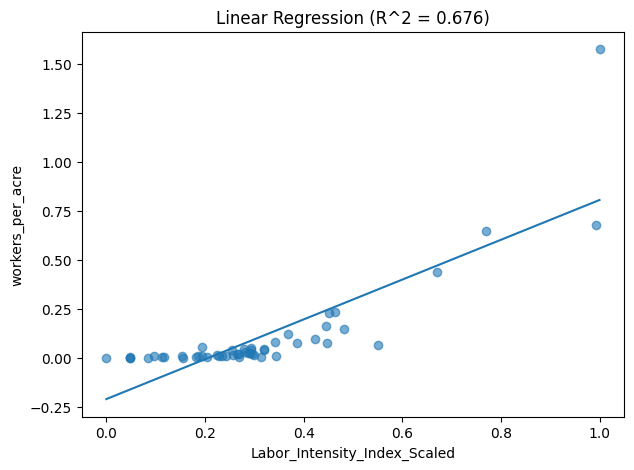

R^2: 0.6135333808386663


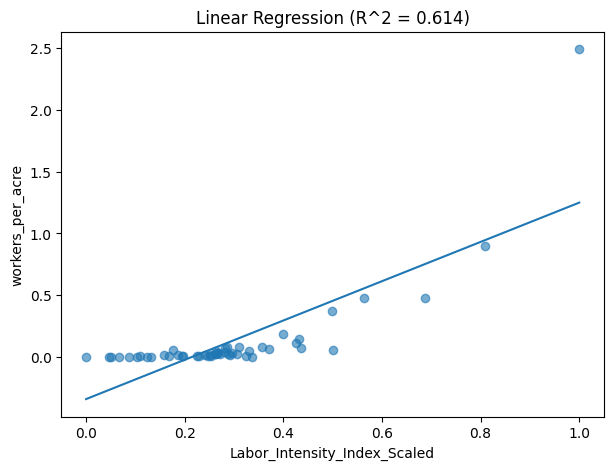

R^2: 0.7385465097168122


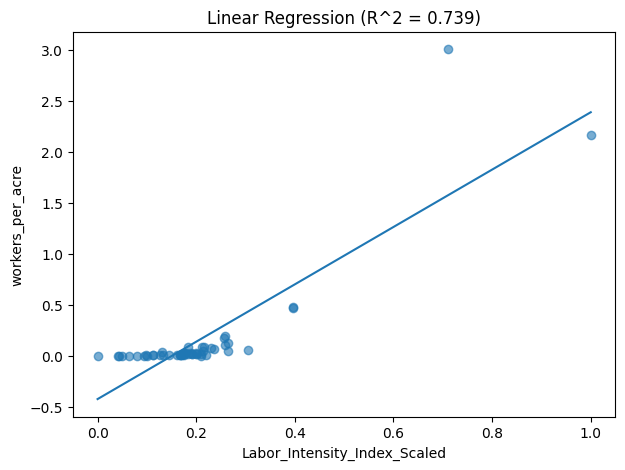

In [37]:
linear_regression_analysis(index_2012, 'Labor_Intensity_Index_Scaled', 'workers_per_acre')
linear_regression_analysis(index_2017, 'Labor_Intensity_Index_Scaled', 'workers_per_acre')
linear_regression_analysis(index_2022, 'Labor_Intensity_Index_Scaled', 'workers_per_acre')

In [44]:
index_2012['total_workers'] = labor_df['TotalWorkers']
index_2017['total_workers'] = labor_df['TotalWorkers']
index_2022['total_workers'] = labor_df['TotalWorkers']

raw # of workers from census of ag
raw # of h2a workers
intensive labor variable

R^2: 1.503108775147144e-05


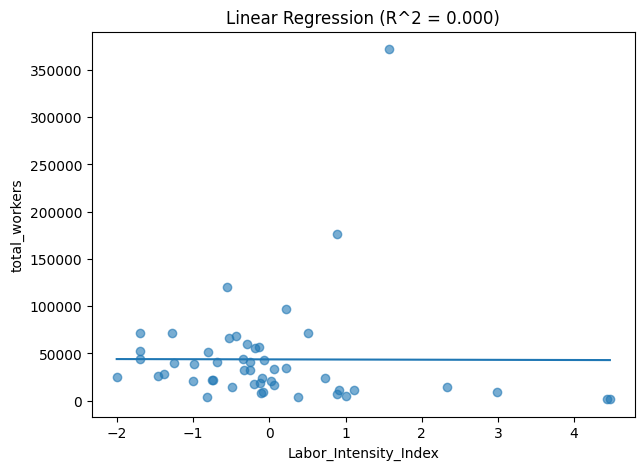

R^2: 6.707330674871059e-06


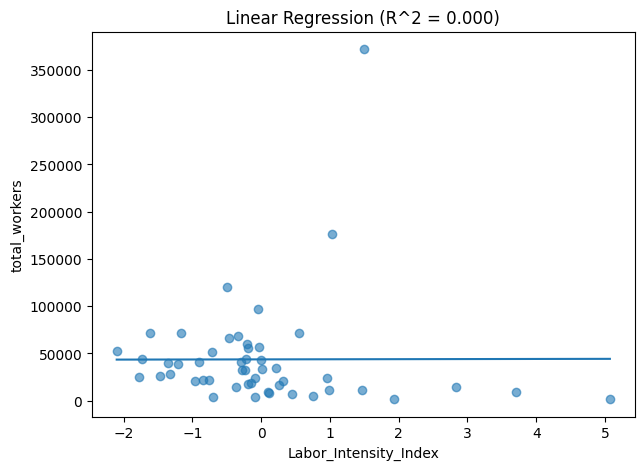

R^2: 0.0029713496795054084


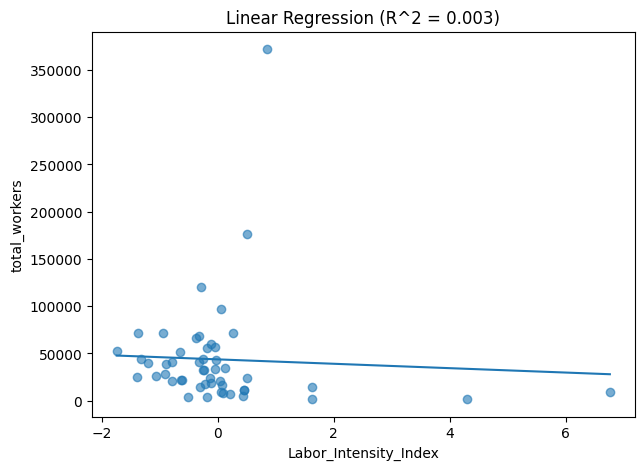

In [ ]:
linear_regression_analysis(index_2012, 'Labor_Intensity_Index', 'total_workers')
linear_regression_analysis(index_2017, 'Labor_Intensity_Index', 'total_workers')
linear_regression_analysis(index_2022, 'Labor_Intensity_Index', 'total_workers')